In [1]:
import wandb
import pandas as pd
import matplotlib.pyplot as plt


In [16]:

# Initialize wandb API
api = wandb.Api()

# Replace 'your_sweep_id' with your actual sweep ID
sweep_id = 'maximes_crew/S3_SC_runs/qzzo2z6v'

# Fetch the sweep object
sweep = api.sweep(sweep_id)

# Fetch all runs in the sweep
runs = sweep.runs

sweep_params = ['lr','nb_state', 'n_hiddens','n_layers','use_readout_layer','normalization','activation','pure_complex']

In [3]:
runs

<Runs maximes_crew/S3_SC_runs>

In [17]:
# Initialize an empty DataFrame to hold the relevant data
data = []

# Extract the necessary data from each run
for run in runs:
    config = run.config
    summary = run.summary
    n_layers = config.get('nb_layers')
    n_hiddens = config.get('nb_hiddens')
    lr = config.get('lr')
    dt_min = config.get('dt_min')
    dt_max = config.get('dt_max')
    pdrop = config.get('pdrop')
    sched_patience = config.get('scheduler_patience')
    sched_factor = config.get('scheduler_factor')
    test_acc = summary.get('test acc')
    s4 = config.get('s4')
    normalization = config.get('normalization')
    use_readout_layer = config.get('use_readout_layer')
    nb_state = config.get('nb_state')
    pure_complex = config.get('pure_complex')
    activation = config.get('activation')


    if test_acc is not None:
        data.append({
            'n_layers': n_layers,
            'n_hiddens': n_hiddens,
            's4':s4,
            'normalization':normalization,
            'use_readout_layer':use_readout_layer,
            'nb_state':nb_state,
            'pure_complex':pure_complex,
            'activation':activation,
            'lr': lr,
            'dt_min': dt_min,
            'dt_max': dt_max,
            'pdrop' : pdrop,
            'scheduler_patience' : sched_patience,
            'scheduler_factor' : sched_factor,
            'test_acc': test_acc
        })



In [18]:
data

[{'n_layers': 3,
  'n_hiddens': 512,
  's4': True,
  'normalization': 'layernorm',
  'use_readout_layer': False,
  'nb_state': 128,
  'pure_complex': True,
  'activation': 'step',
  'lr': 0.001,
  'dt_min': 0.01,
  'dt_max': 0.7,
  'pdrop': 0.1,
  'scheduler_patience': 5,
  'scheduler_factor': 0.7,
  'test_acc': 0.9534789745388932},
 {'n_layers': 3,
  'n_hiddens': 512,
  's4': True,
  'normalization': 'layernorm',
  'use_readout_layer': True,
  'nb_state': 128,
  'pure_complex': True,
  'activation': 'step',
  'lr': 0.001,
  'dt_min': 0.01,
  'dt_max': 0.7,
  'pdrop': 0.1,
  'scheduler_patience': 5,
  'scheduler_factor': 0.7,
  'test_acc': 0.9536418654771452},
 {'n_layers': 3,
  'n_hiddens': 512,
  's4': True,
  'normalization': 'layernorm',
  'use_readout_layer': False,
  'nb_state': 128,
  'pure_complex': True,
  'activation': 'step',
  'lr': 0.001,
  'dt_min': 0.01,
  'dt_max': 0.7,
  'pdrop': 0.1,
  'scheduler_patience': 5,
  'scheduler_factor': 0.7,
  'test_acc': 0.946083099438652

In [19]:
# Convert the data to a DataFrame for easier manipulation
df = pd.DataFrame(data)

# Group by the sweep parameters and compute the mean of best_valid_acc for each group
df_grouped = df.groupby(sweep_params).agg({'test_acc': 'mean'}).reset_index()

# Calculate the number of runs for each configuration
df['run_count'] = df.groupby(sweep_params)['test_acc'].transform('size')

# Add the run count to the grouped DataFrame
df_grouped = df_grouped.merge(df[sweep_params + ['run_count']].drop_duplicates(), on=sweep_params, how='left')

# Sort by best_valid_acc in descending order
df_grouped_sorted = df_grouped.sort_values(by='test_acc', ascending=False).reset_index(drop=True)

# Display the sorted DataFrame
df_grouped_sorted

df_step_grouped_sorted = df_grouped_sorted

In [12]:
df_step_grouped_sorted

,lr,nb_state,normalization,pure_complex,use_readout_layer,test_acc,run_count
0,0.001,128,layernorm,True,True,0.948484,20
1,0.001,128,batchnorm,True,True,0.947893,20
2,0.001,64,batchnorm,True,True,0.947663,20
3,0.001,64,layernorm,True,True,0.946555,20
4,0.001,128,layernorm,True,False,0.944159,20
5,0.001,4,batchnorm,True,True,0.943643,20
6,0.001,4,layernorm,True,True,0.938148,20
7,0.001,128,batchnorm,True,False,0.937976,20
8,0.001,2,layernorm,True,True,0.936488,20
9,0.001,2,layernorm,True,False,0.932873,20


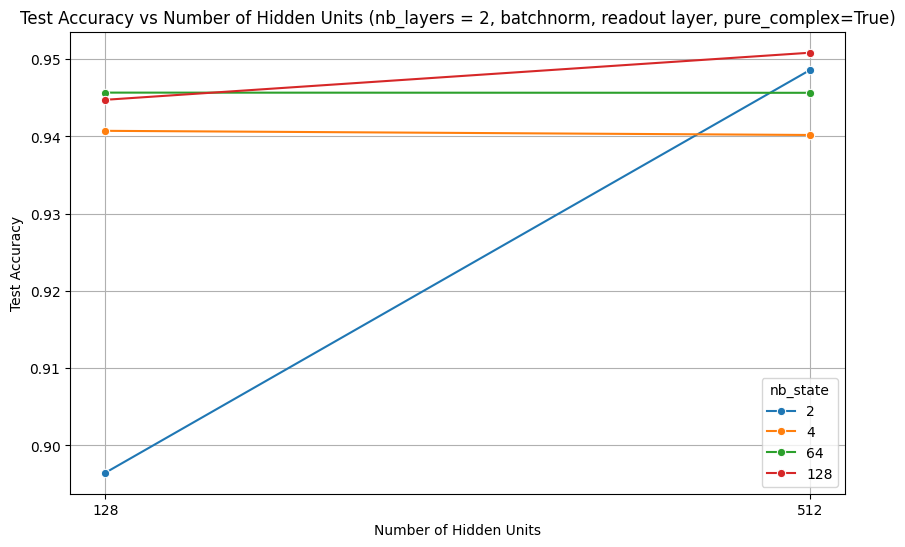

nb_state,2,4,64,128
n_hiddens,,,,
128,"0.92902 ( batchnorm, readout: True)","0.94256 ( layernorm, readout: False)","0.94647 ( batchnorm, readout: True)","0.94729 ( layernorm, readout: True)"
512,"0.94869 ( layernorm, readout: True)","0.95200 ( layernorm, readout: True)","0.95286 ( batchnorm, readout: True)","0.95285 ( batchnorm, readout: False)"


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame for nb_layers = 2, batchnorm, readout_layer=True, pure_complex=True
filtered_df = df_step_grouped_sorted[
    (df_step_grouped_sorted['n_layers'] == 2) &
    (df_step_grouped_sorted['normalization'] == 'batchnorm') &
    (df_step_grouped_sorted['use_readout_layer'] == True) &
    (df_step_grouped_sorted['pure_complex'] == True)
]

# Define a custom color palette to ensure each nb_state gets a unique color
palette = sns.color_palette("tab10", n_colors=filtered_df['nb_state'].nunique())

# Plotting
plt.figure(figsize=(10, 6))

# Plot with seaborn, using nb_hiddens on x-axis, test_acc on y-axis, and hue for different nb_states
sns.lineplot(
    data=filtered_df,
    x='n_hiddens', 
    y='test_acc', 
    hue='nb_state', 
    marker='o',
    palette=palette  # Ensure each line gets a unique color
)

# Set exact numbers as x-axis ticks
plt.xticks(filtered_df['n_hiddens'].unique())

# Add labels and title
plt.xlabel('Number of Hidden Units')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs Number of Hidden Units (nb_layers = 2, batchnorm, readout layer, pure_complex=True)')
plt.legend(title='nb_state')
plt.grid(True)

# Show the plot
plt.show()


import pandas as pd

# Filter the DataFrame for nb_layers = 2, batchnorm, readout_layer=True, pure_complex=True
filtered_df = df_step_grouped_sorted[
    (df_step_grouped_sorted['n_layers'] == 3)
]

import pandas as pd

# Group by 'nb_state' and 'n_hiddens', then find the row with the best test_acc for each combination
best_config_df = filtered_df.loc[
    filtered_df.groupby(['nb_state', 'n_hiddens'])['test_acc'].idxmax()
]

# Create a column combining test_acc with the relevant parameters
best_config_df['test_acc_with_params'] = best_config_df.apply(
    lambda row: f"{row['test_acc']:.5f} ( {row['normalization']}, readout: {row['use_readout_layer']})", axis=1
)

# Create a pivot table with the combined 'test_acc_with_params' values
comparison_table = best_config_df.pivot_table(
    values='test_acc_with_params', 
    index='n_hiddens', 
    columns='nb_state', 
    aggfunc='first'
)

# Display the final table with test accuracy and parameters
comparison_table

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame for n_hiddens = 512, batchnorm, and use_readout_layer = True
filtered_df_512_batchnorm = df_step_grouped_sorted[
    (df_step_grouped_sorted['n_hiddens'] == 512) &
    (df_step_grouped_sorted['normalization'] == 'batchnorm') &
    (df_step_grouped_sorted['use_readout_layer'] == True)
]

# Define a custom color palette to ensure each nb_state gets a unique color
palette = sns.color_palette("tab10", n_colors=filtered_df_512_batchnorm['nb_state'].nunique())

# Plotting
plt.figure(figsize=(10, 6))

# Plot with seaborn, using nb_layers on the x-axis, test_acc on the y-axis, and hue for different nb_states
sns.lineplot(
    data=filtered_df_512_batchnorm,
    x='n_layers', 
    y='test_acc', 
    hue='nb_state', 
    marker='o',
    palette=palette  # Ensure each line gets a unique color
)

# Set exact numbers as x-axis ticks
plt.xticks(filtered_df_512_batchnorm['n_layers'].unique())

# Add labels and title
plt.xlabel('Number of Layers')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs Number of Layers (n_hiddens = 512, batchnorm, readout layer)')
plt.legend(title='nb_state')
plt.grid(True)

# Show the plot
plt.show()


KeyError: 'n_hiddens'

In [55]:
df_grouped_sorted[0:10]


,lr,nb_state,normalization,pure_complex,use_readout_layer,best_valid_acc,activation
0,0.005,2,batchnorm,False,False,0.885322,step
1,0.005,2,batchnorm,False,True,0.911182,step
2,0.005,2,batchnorm,True,False,0.903472,step
3,0.005,2,batchnorm,True,True,0.919792,step
4,0.005,2,layernorm,False,False,0.842787,step
5,0.005,2,layernorm,False,True,0.878851,step
6,0.005,2,layernorm,True,False,0.873074,step
7,0.005,2,layernorm,True,True,0.885969,step
8,0.005,4,batchnorm,False,False,0.884462,step
9,0.005,4,batchnorm,False,True,0.916769,step


In [63]:
df_step_grouped_sorted = df_step_grouped.sort_values(by='best_valid_acc', ascending=False).reset_index(drop=True)
df_gelu_grouped_sorted = df_gelu_grouped.sort_values(by='best_valid_acc', ascending=False).reset_index(drop=True)

df_step_grouped_sorted[0:10]

,lr,nb_state,normalization,pure_complex,use_readout_layer,best_valid_acc,activation
0,0.010,6,batchnorm,True,True,0.934209,step
1,0.010,64,batchnorm,True,True,0.931834,step
2,0.005,6,batchnorm,True,True,0.931321,step
3,0.005,64,batchnorm,True,True,0.930429,step
4,0.005,32,batchnorm,True,True,0.930114,step
5,0.010,128,batchnorm,True,True,0.930106,step
6,0.005,128,batchnorm,True,True,0.929459,step
7,0.010,128,batchnorm,False,True,0.929143,step
8,0.010,32,batchnorm,False,True,0.928520,step
9,0.010,32,batchnorm,True,True,0.927541,step


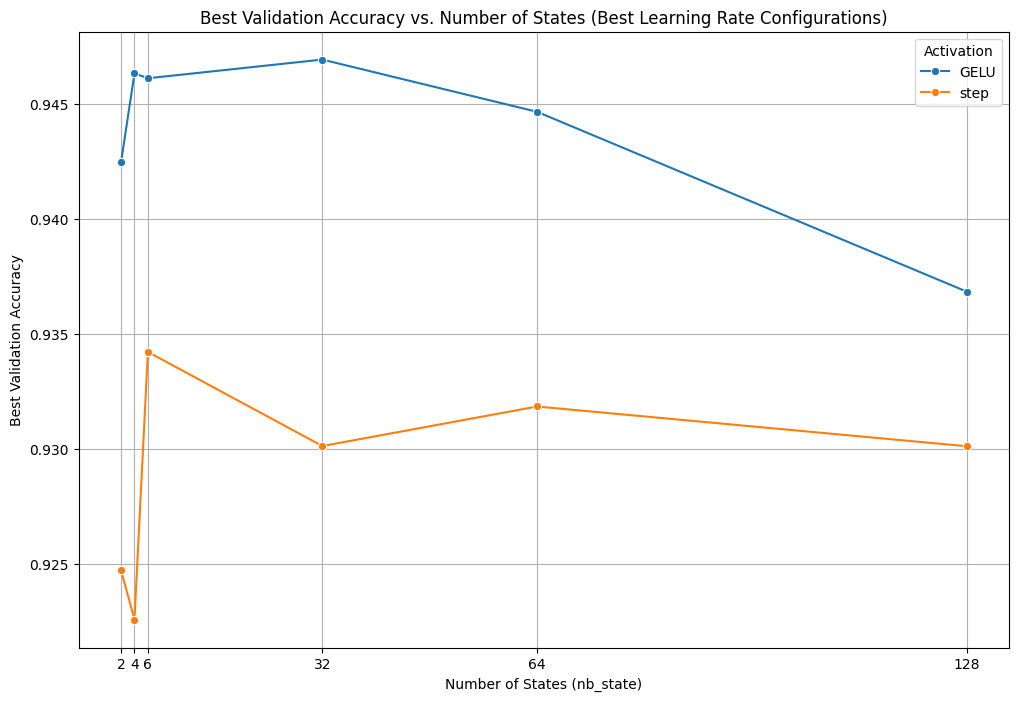

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame based on criteria for step activation
filtered_df_step = df_step_grouped_sorted[
    (df_step_grouped_sorted['normalization'] == 'batchnorm') &
    (df_step_grouped_sorted['pure_complex'] == True) &
    (df_step_grouped_sorted['use_readout_layer'] == True)
].copy()

# Filter the DataFrame based on criteria for GELU activation
filtered_df_gelu = df_gelu_grouped_sorted[
    (df_gelu_grouped_sorted['normalization'] == 'batchnorm') &
    (df_gelu_grouped_sorted['pure_complex'] == True) &
    (df_gelu_grouped_sorted['use_readout_layer'] == True)
].copy()

# Add a column to distinguish between activation types
filtered_df_step['activation'] = 'step'
filtered_df_gelu['activation'] = 'GELU'

# Combine the filtered DataFrames for both activations
combined_df = pd.concat([filtered_df_step, filtered_df_gelu], ignore_index=True)

# Find the best learning rate for each configuration
best_lr_df = combined_df.loc[combined_df.groupby(
    ['nb_state', 'normalization', 'pure_complex', 'use_readout_layer', 'activation']
)['best_valid_acc'].idxmax()]

# Plot best_valid_acc against nb_state for the best learning rate configurations
plt.figure(figsize=(12, 8))
sns.lineplot(data=best_lr_df, x='nb_state', y='best_valid_acc', hue='activation', marker='o')

# Set exact nb_state values on the x-axis
unique_nb_states = sorted(best_lr_df['nb_state'].unique())
plt.xticks(ticks=unique_nb_states, labels=unique_nb_states)

# Customize the plot
plt.title('Best Validation Accuracy vs. Number of States (Best Learning Rate Configurations)')
plt.xlabel('Number of States (nb_state)')
plt.ylabel('Best Validation Accuracy')
plt.legend(title='Activation')
plt.grid(True)
plt.show()


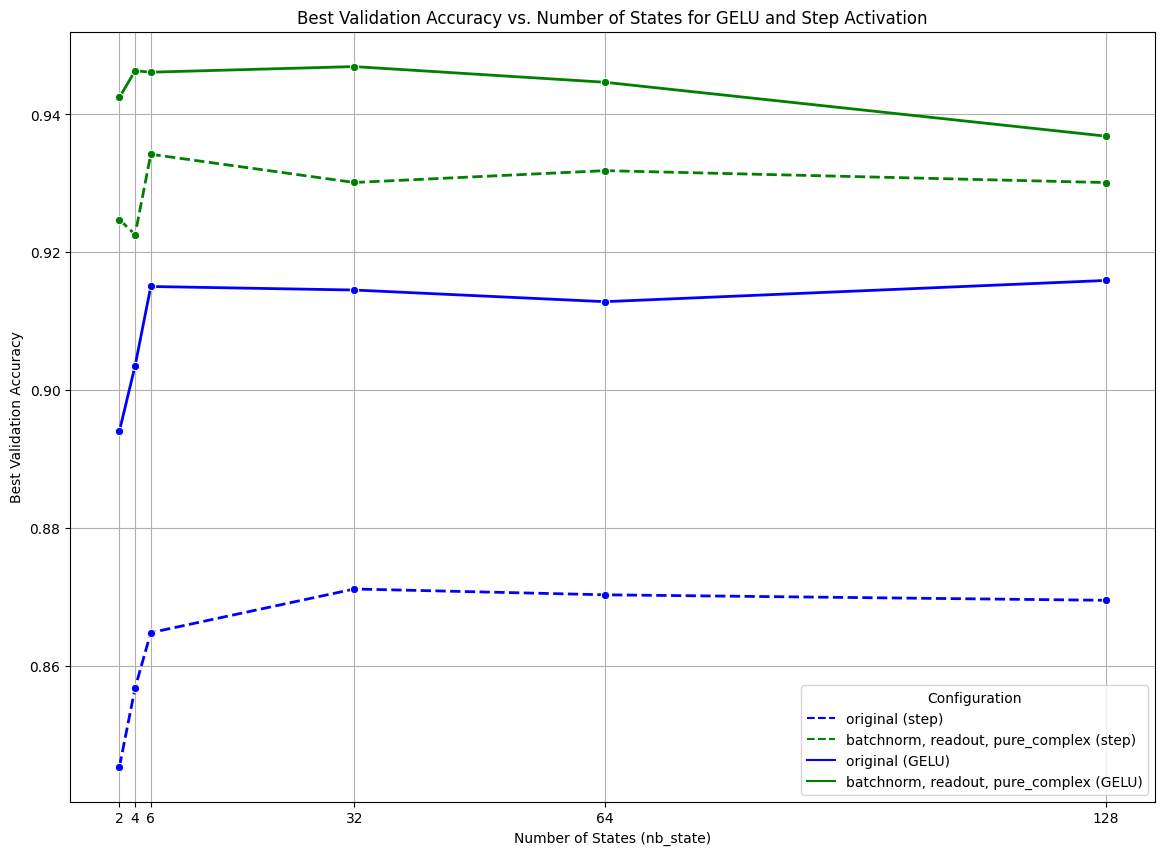

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines


# Filter df_step_grouped_sorted for the two specific configurations
# Configuration 1: use_readout = False, pure_complex = False, normalization = layernorm
config1_step = df_step_grouped_sorted[
    (df_step_grouped_sorted['use_readout_layer'] == False) &
    (df_step_grouped_sorted['pure_complex'] == False) &
    (df_step_grouped_sorted['normalization'] == 'layernorm')
].copy()

# Configuration 2: use_readout = True, pure_complex = True, normalization = batchnorm
config2_step = df_step_grouped_sorted[
    (df_step_grouped_sorted['use_readout_layer'] == True) &
    (df_step_grouped_sorted['pure_complex'] == True) &
    (df_step_grouped_sorted['normalization'] == 'batchnorm')
].copy()

# Find the best learning rate for each configuration
best_lr_config1_step = config1_step.loc[config1_step.groupby(
    ['nb_state', 'activation', 'pure_complex', 'use_readout_layer', 'normalization']
)['best_valid_acc'].idxmax()]

best_lr_config2_step = config2_step.loc[config2_step.groupby(
    ['nb_state', 'activation', 'pure_complex', 'use_readout_layer', 'normalization']
)['best_valid_acc'].idxmax()]

# Add a column to distinguish between configurations
best_lr_config1_step['configuration'] = 'original (step)'
best_lr_config2_step['configuration'] = 'batchnorm, readout, pure_complex (step)'

# Combine the DataFrames for step activation
combined_df_step = pd.concat([best_lr_config1_step, best_lr_config2_step], ignore_index=True)

# Add GELU configurations to combined_df_step for comparison
best_lr_config1_gelu = best_lr_config1.copy()
best_lr_config2_gelu = best_lr_config2.copy()

best_lr_config1_gelu['configuration'] = 'original (GELU)'
best_lr_config2_gelu['configuration'] = 'batchnorm, readout, pure_complex (GELU)'

# Combine GELU and step DataFrames
combined_df = pd.concat([combined_df_step, best_lr_config1_gelu, best_lr_config2_gelu], ignore_index=True)

# Define color and style for each configuration
palette = {
    'original (step)': 'blue',
    'batchnorm, readout, pure_complex (step)': 'green',
    'original (GELU)': 'blue',
    'batchnorm, readout, pure_complex (GELU)': 'green'
}

# Plot best_valid_acc against nb_state for the best learning rate configurations
plt.figure(figsize=(14, 10))
ax = sns.lineplot(data=combined_df, x='nb_state', y='best_valid_acc', hue='configuration', 
             palette=palette, marker='o', linewidth=2)

# Manually set line styles for different configurations
ax.lines[0].set_linestyle("--")  # Dashed for 'original (step)'
ax.lines[1].set_linestyle("--")  # Dashed for 'batchnorm, readout, pure_complex (step)'

# Set exact nb_state values on the x-axis
unique_nb_states = sorted(combined_df['nb_state'].unique())
plt.xticks(ticks=unique_nb_states, labels=unique_nb_states)

# Create custom legend entries with correct line styles
legend_lines = [
    mlines.Line2D([], [], color='blue', linestyle='--', label='original (step)'),
    mlines.Line2D([], [], color='green', linestyle='--', label='batchnorm, readout, pure_complex (step)'),
    mlines.Line2D([], [], color='blue', linestyle='-',  label='original (GELU)'),
    mlines.Line2D([], [], color='green', linestyle='-',  label='batchnorm, readout, pure_complex (GELU)')
]

# Customize the plot
plt.title('Best Validation Accuracy vs. Number of States for GELU and Step Activation')
plt.xlabel('Number of States (nb_state)')
plt.ylabel('Best Validation Accuracy')
plt.grid(True)

# Add the custom legend
plt.legend(handles=legend_lines, title='Configuration')

plt.show()

Hidden

In [2]:


# Initialize wandb API
api = wandb.Api()

# Replace 'your_sweep_id' with your actual sweep ID
sweep_id = 'maximes_crew/S3_SHD_runs/pj1sj9r0'

# Fetch the sweep object
sweep = api.sweep(sweep_id)

# Fetch all runs in the sweep
runs = sweep.runs

sweep_params = ['nb_state','nb_hiddens','normalization','pure_complex','use_readout_layer']

# Initialize an empty DataFrame to hold the relevant data
data = []

# Extract the necessary data from each run
for run in runs:
    config = run.config
    summary = run.summary
    n_layers = config.get('nb_layers')
    nb_hiddens = config.get('nb_hiddens')
    lr = config.get('lr')
    dt_min = config.get('dt_min')
    dt_max = config.get('dt_max')
    pdrop = config.get('pdrop')
    sched_patience = config.get('scheduler_patience')
    sched_factor = config.get('scheduler_factor')
    best_valid_acc = summary.get('best valid acc')
    s4 = config.get('s4')
    normalization = config.get('normalization')
    use_readout_layer = config.get('use_readout_layer')
    nb_state = config.get('nb_state')
    pure_complex = config.get('pure_complex')
    activation = config.get('activation')


    if best_valid_acc is not None:
        data.append({
            'n_layers': n_layers,
            'nb_hiddens': nb_hiddens,
            's4':s4,
            'normalization':normalization,
            'use_readout_layer':use_readout_layer,
            'nb_state':nb_state,
            'pure_complex':pure_complex,
            'activation':activation,
            'lr': lr,
            'dt_min': dt_min,
            'dt_max': dt_max,
            'pdrop' : pdrop,
            'scheduler_patience' : sched_patience,
            'scheduler_factor' : sched_factor,
            'best_valid_acc': best_valid_acc
        })



In [3]:
# Convert the data to a DataFrame for easier manipulation
df = pd.DataFrame(data)

# Group by the sweep parameters and compute the mean of best_valid_acc for each group
df_grouped = df.groupby(sweep_params).agg({'best_valid_acc': 'mean'}).reset_index()

# Calculate the number of runs for each configuration
df['run_count'] = df.groupby(sweep_params)['best_valid_acc'].transform('size')

# Add the run count to the grouped DataFrame
df_grouped = df_grouped.merge(df[sweep_params + ['run_count']].drop_duplicates(), on=sweep_params, how='left')

# Sort by best_valid_acc in descending order
df_grouped_sorted = df_grouped.sort_values(by='best_valid_acc', ascending=False).reset_index(drop=True)

# Display the sorted DataFrame
df_grouped_sorted

,nb_state,nb_hiddens,normalization,pure_complex,use_readout_layer,best_valid_acc,run_count
0,6,256,batchnorm,True,True,0.940522,5
1,32,256,batchnorm,True,True,0.939860,5
2,6,128,batchnorm,True,True,0.937334,5
3,128,256,batchnorm,True,True,0.937303,5
4,4,256,batchnorm,True,True,0.936379,5
...,...,...,...,...,...,...,...
115,2,64,batchnorm,False,False,0.879861,5
116,32,1024,batchnorm,False,True,0.857008,5
117,6,1024,batchnorm,False,True,0.807378,5
118,4,1024,batchnorm,False,True,0.790475,5


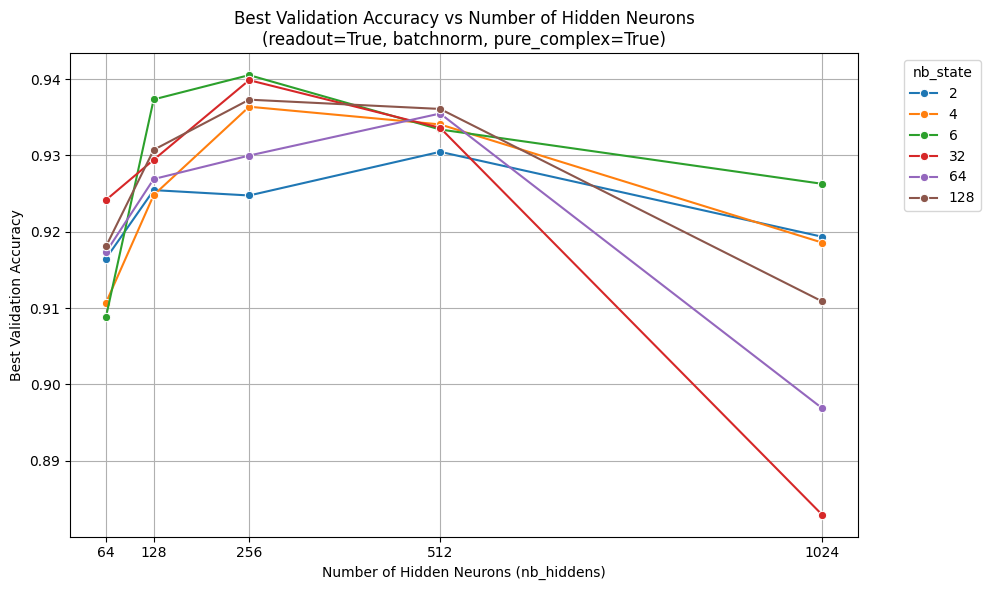

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame for the required configuration
df_filtered = df_grouped_sorted[
    (df_grouped_sorted['use_readout_layer'] == True) &
    (df_grouped_sorted['normalization'] == 'batchnorm') &
    (df_grouped_sorted['pure_complex'] == True)
]

# Create a line plot with each line representing a different 'nb_state'
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_filtered,
    x='nb_hiddens', 
    y='best_valid_acc', 
    hue='nb_state', 
    marker="o", 
    palette='tab10'
)

# Add labels and title
plt.title('Best Validation Accuracy vs Number of Hidden Neurons\n(readout=True, batchnorm, pure_complex=True)')
plt.xlabel('Number of Hidden Neurons (nb_hiddens)')
plt.ylabel('Best Validation Accuracy')

# Set exact x-tick values (all unique 'nb_hiddens' values)
plt.xticks(sorted(df_filtered['nb_hiddens'].unique()))

# Add legend and grid
plt.legend(title='nb_state', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


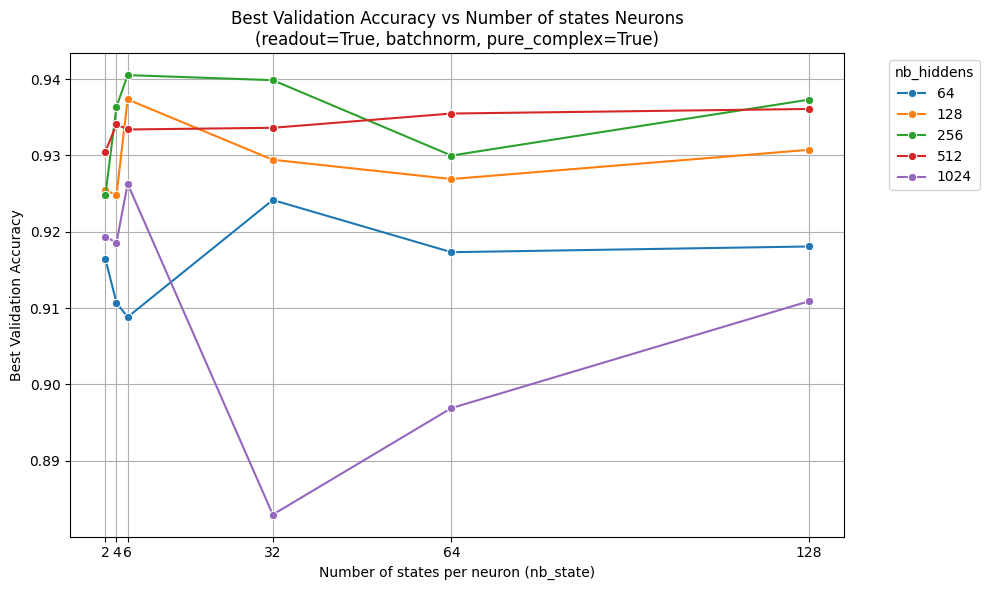

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame for the required configuration
df_filtered = df_grouped_sorted[
    (df_grouped_sorted['use_readout_layer'] == True) &
    (df_grouped_sorted['normalization'] == 'batchnorm') &
    (df_grouped_sorted['pure_complex'] == True)
]

# Create a line plot with each line representing a different 'nb_state'
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_filtered,
    x='nb_state', 
    y='best_valid_acc', 
    hue='nb_hiddens', 
    marker="o", 
    palette='tab10'
)

# Add labels and title
plt.title('Best Validation Accuracy vs Number of states Neurons\n(readout=True, batchnorm, pure_complex=True)')
plt.xlabel('Number of states per neuron (nb_state)')
plt.ylabel('Best Validation Accuracy')

# Set exact x-tick values (all unique 'nb_hiddens' values)
plt.xticks(sorted(df_filtered['nb_state'].unique()))

# Add legend and grid
plt.legend(title='nb_hiddens', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


In [5]:

import wandb
import pandas as pd
import matplotlib.pyplot as plt

# Initialize wandb API
api = wandb.Api()

# Replace 'your_sweep_id' with your actual sweep ID
sweep_id = 'maximes_crew/S3_SHD_runs/02o5b8gs'

# Fetch the sweep object
sweep = api.sweep(sweep_id)

# Fetch all runs in the sweep
runs = sweep.runs

sweep_params = ['activation','spatial_bin','time_offset','max_time','nb_state','nb_hiddens','normalization','pure_complex','use_readout_layer']

# Initialize an empty DataFrame to hold the relevant data
data = []

# Extract the necessary data from each run
for run in runs:
    config = run.config
    summary = run.summary
    n_layers = config.get('nb_layers')
    nb_hiddens = config.get('nb_hiddens')
    lr = config.get('lr')
    dt_min = config.get('dt_min')
    dt_max = config.get('dt_max')
    pdrop = config.get('pdrop')
    sched_patience = config.get('scheduler_patience')
    sched_factor = config.get('scheduler_factor')
    best_valid_acc = summary.get('best valid acc')
    s4 = config.get('s4')
    normalization = config.get('normalization')
    use_readout_layer = config.get('use_readout_layer')
    nb_state = config.get('nb_state')
    pure_complex = config.get('pure_complex')
    activation = config.get('activation')
    spatial_bin = config.get('spatial_bin')
    time_offset = config.get('time_offset')
    max_time = config.get('max_time')

    if best_valid_acc is not None:
        data.append({
            'n_layers': n_layers,
            'nb_hiddens': nb_hiddens,
            's4':s4,
            'normalization':normalization,
            'use_readout_layer':use_readout_layer,
            'nb_state':nb_state,
            'pure_complex':pure_complex,
            'activation':activation,
            'lr': lr,
            'dt_min': dt_min,
            'dt_max': dt_max,
            'pdrop' : pdrop,
            'scheduler_patience' : sched_patience,
            'scheduler_factor' : sched_factor,
            'best_valid_acc': best_valid_acc, 
            'spatial_bin':spatial_bin,
            'time_offset':time_offset,
            'max_time':max_time
        })


In [6]:
# Convert the data to a DataFrame for easier manipulation
df = pd.DataFrame(data)

# Group by the sweep parameters and compute the mean of best_valid_acc for each group
df_grouped = df.groupby(sweep_params).agg({'best_valid_acc': 'mean'}).reset_index()

# Calculate the number of runs for each configuration
df['run_count'] = df.groupby(sweep_params)['best_valid_acc'].transform('size')

# Add the run count to the grouped DataFrame
df_grouped = df_grouped.merge(df[sweep_params + ['run_count']].drop_duplicates(), on=sweep_params, how='left')

# Sort by best_valid_acc in descending order
df_grouped_sorted = df_grouped.sort_values(by='best_valid_acc', ascending=False).reset_index(drop=True)

# Display the sorted DataFrame
df_grouped_sorted

,activation,spatial_bin,time_offset,max_time,nb_state,nb_hiddens,normalization,pure_complex,use_readout_layer,best_valid_acc,run_count
0,GELU,5,0,1.0,2,128,batchnorm,True,True,0.948043,5
1,GELU,1,10,1.4,2,128,batchnorm,True,True,0.943497,5
2,GELU,1,0,1.0,2,128,batchnorm,True,True,0.942124,5
3,GELU,1,10,1.0,2,128,batchnorm,True,True,0.941201,5
4,GELU,5,0,1.4,2,128,batchnorm,True,True,0.938621,5
...,...,...,...,...,...,...,...,...,...,...,...
59,step,1,0,1.4,2,128,layernorm,True,True,0.874290,5
60,step,1,0,1.0,2,128,layernorm,True,False,0.872388,5
61,step,1,10,1.0,2,128,layernorm,True,False,0.872388,5
62,step,1,10,1.4,2,128,layernorm,True,False,0.870786,5


In [15]:
# Filter the DataFrame for the desired configuration
originnalS4_df = df_grouped_sorted[
    (df_grouped_sorted['normalization'] == 'layernorm') &
    (df_grouped_sorted['use_readout_layer'] == False) &
    (df_grouped_sorted['activation'] == 'GELU') 
]

# Display the filtered DataFrame
originnalS4_df


,activation,spatial_bin,time_offset,max_time,nb_state,nb_hiddens,normalization,pure_complex,use_readout_layer,best_valid_acc,run_count
30,GELU,5,10,1.4,2,128,layernorm,True,False,0.919026,5
31,GELU,5,0,1.4,2,128,layernorm,True,False,0.919026,5
35,GELU,5,0,1.0,2,128,layernorm,True,False,0.916501,5
36,GELU,5,10,1.0,2,128,layernorm,True,False,0.916501,5
41,GELU,1,0,1.0,2,128,layernorm,True,False,0.912516,5
42,GELU,1,10,1.0,2,128,layernorm,True,False,0.912516,5
45,GELU,1,10,1.4,2,128,layernorm,True,False,0.910156,5
46,GELU,1,0,1.4,2,128,layernorm,True,False,0.910156,5


In [16]:
# Filter the DataFrame for the desired configuration
originnalS4step_df = df_grouped_sorted[
    (df_grouped_sorted['normalization'] == 'layernorm') &
    (df_grouped_sorted['use_readout_layer'] == False) &
    (df_grouped_sorted['activation'] == 'step') 
]

# Display the filtered DataFrame
originnalS4step_df


,activation,spatial_bin,time_offset,max_time,nb_state,nb_hiddens,normalization,pure_complex,use_readout_layer,best_valid_acc,run_count
52,step,5,10,1.0,2,128,layernorm,True,False,0.897396,5
53,step,5,0,1.0,2,128,layernorm,True,False,0.897396,5
55,step,5,0,1.4,2,128,layernorm,True,False,0.892085,5
56,step,5,10,1.4,2,128,layernorm,True,False,0.892085,5
60,step,1,0,1.0,2,128,layernorm,True,False,0.872388,5
61,step,1,10,1.0,2,128,layernorm,True,False,0.872388,5
62,step,1,10,1.4,2,128,layernorm,True,False,0.870786,5
63,step,1,0,1.4,2,128,layernorm,True,False,0.870786,5


In [17]:
# Filter the DataFrame for the desired configuration
S4stepNormReadout_df = df_grouped_sorted[
    (df_grouped_sorted['normalization'] == 'batchnorm') &
    (df_grouped_sorted['use_readout_layer'] == True) &
    (df_grouped_sorted['activation'] == 'step') 
]

# Display the filtered DataFrame
S4stepNormReadout_df

,activation,spatial_bin,time_offset,max_time,nb_state,nb_hiddens,normalization,pure_complex,use_readout_layer,best_valid_acc,run_count
8,step,5,0,1.0,2,128,batchnorm,True,True,0.934746,5
16,step,5,10,1.0,2,128,batchnorm,True,True,0.928969,5
17,step,1,10,1.0,2,128,batchnorm,True,True,0.927778,5
18,step,5,10,1.4,2,128,batchnorm,True,True,0.927336,5
19,step,1,0,1.0,2,128,batchnorm,True,True,0.926926,5
25,step,1,10,1.4,2,128,batchnorm,True,True,0.924874,5
26,step,5,0,1.4,2,128,batchnorm,True,True,0.924274,5
27,step,1,0,1.4,2,128,batchnorm,True,True,0.922348,5


In [8]:
# Filter the DataFrame by activation function
df_gelu = df[df['activation'] == 'GELU']
df_step = df[df['activation'] == 'step']

# Group by the sweep parameters and compute the mean of best_valid_acc for each group
df_gelu_grouped = df_gelu.groupby(sweep_params).agg({'best_valid_acc': 'mean'}).reset_index()
df_step_grouped = df_step.groupby(sweep_params).agg({'best_valid_acc': 'mean'}).reset_index()

# Add the activation column for comparison
df_gelu_grouped['activation'] = 'GELU'
df_step_grouped['activation'] = 'step'

df_step_grouped_sorted = df_step_grouped.sort_values(by='best_valid_acc', ascending=False).reset_index(drop=True)
df_gelu_grouped_sorted = df_gelu_grouped.sort_values(by='best_valid_acc', ascending=False).reset_index(drop=True)

df_step_grouped_sorted[0:10]

,activation,spatial_bin,time_offset,max_time,nb_state,nb_hiddens,normalization,pure_complex,use_readout_layer,best_valid_acc
0,step,5,0,1.0,2,128,batchnorm,True,True,0.934746
1,step,5,10,1.0,2,128,batchnorm,True,True,0.928969
2,step,1,10,1.0,2,128,batchnorm,True,True,0.927778
3,step,5,10,1.4,2,128,batchnorm,True,True,0.927336
4,step,1,0,1.0,2,128,batchnorm,True,True,0.926926
5,step,1,10,1.4,2,128,batchnorm,True,True,0.924874
6,step,5,0,1.4,2,128,batchnorm,True,True,0.924274
7,step,1,0,1.4,2,128,batchnorm,True,True,0.922348
8,step,5,10,1.0,2,128,batchnorm,True,False,0.919863
9,step,5,0,1.0,2,128,batchnorm,True,False,0.919863
